True Positive Rate (TPR / Sensitivity / Recall): 0.84
False Positive Rate (FPR): 0.07
True Negative Rate (TNR / Specificity): 0.93
False Negative Rate (FNR): 0.16
Precision: 0.93
F1 Score: 0.88
ROC-AUC Score: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        97
           1       0.93      0.84      0.88       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



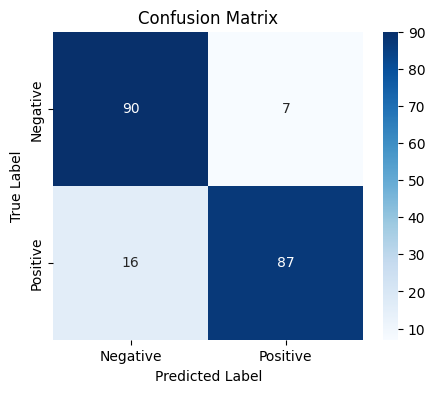

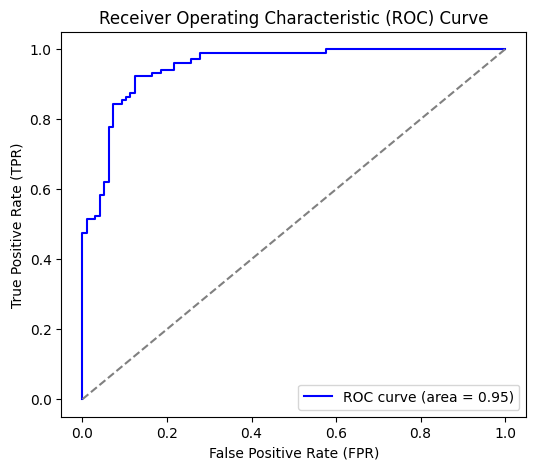

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve

cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]  
FP = cm[0, 1]  
TN = cm[0, 0]  
FN = cm[1, 0]  

TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)
TNR = TN / (TN + FP)  
FNR = FN / (FN + TP)
Precision = TP / (TP + FP)
Recall = TPR  
F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
ROC_AUC = auc(*roc_curve(y_test, y_pred_proba)[:2])


print(f"True Positive Rate (TPR / Sensitivity / Recall): {TPR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")
print(f"True Negative Rate (TNR / Specificity): {TNR:.2f}")
print(f"False Negative Rate (FNR): {FNR:.2f}")
print(f"Precision: {Precision:.2f}")
print(f"F1 Score: {F1_Score:.2f}")
print(f"ROC-AUC Score: {ROC_AUC:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {ROC_AUC:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()
